# Linear regression

### Prediction

$$
\begin{align*}
\hat{y} &= \mathbf{w^\intercal x} + b \\
\end{align*}
$$

### Squared error loss
$$
\begin{align*}
L(\hat{y}, y) &= (\hat{y} - y)^2
\end{align*}
$$

### Squared error loss partial derivatives
$$
\begin{align*}
\frac{\partial L}{\partial \hat{y}} &= 2(\hat{y} - y)\\
\frac{\partial \hat{y}}{\partial \mathbf{w}} &= \mathbf{x} \\
\frac{\partial \hat{y}}{\partial b} &= 1 \\
\end{align*}
$$

### Mean squared error
$$
\begin{align*}
E(\mathbf{w}|\mathcal{D}) &= \frac{1}{N} \sum_{i = 1}^{N} L(\hat{y_i}, y_i) \\
&= \frac{1}{N} \sum_{i = 1}^{N} (\hat{y}_i - y_i)^2 \\
\end{align*}
$$

### Error function gradients
$$
\begin{align*}
\frac{\partial E}{\partial \mathbf{w}} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \mathbf{w}} = 2(\hat{y} - y) \mathbf{x} \\
\frac{\partial E}{\partial b} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = 2(\hat{y} - y)
\end{align*}
$$

### Gradient descent updates
$$
\begin{align*}
\Delta \mathbf{w} &= \frac{\partial E}{\partial \mathbf{w}} =  2(\hat{y} - y) \mathbf{x}\\
\Delta b &= \frac{\partial E}{\partial b} = 2(\hat{y} - y) \\
\mathbf{w}_{t + 1} &= \mathbf{w}_{t} - \alpha \Delta \mathbf{w} \\
b_{t + 1} &= b_t - \alpha \Delta b
\end{align*}
$$

### Parameters formula using the pseudoinverse $\mathbf{X}^+ = (\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal$

$$
\begin{align*}
\mathbf{X}\mathbf{w} &= \mathbf{y} & / \cdot \mathbf{X}^\intercal\\
\mathbf{X}^\intercal \mathbf{X} \mathbf{w} &= \mathbf{X}^\intercal \mathbf{y}& / \cdot (\mathbf{X}^\intercal \mathbf{X})^{-1} \\
(\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal \mathbf{X} \mathbf{w} &= (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{y}\\
\mathbf{w} &= (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{y}\\
\mathbf{w} &= \mathbf{X}^+ \mathbf{y}
\end{align*}

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression with pseudoinverse implementation

In [14]:
class LinearRegressionPinv:

    def __init__(self) -> None:
        """
        Linear Regression implemented using the Moore-Penrose pseudo-inverse of a matrix.

        Attributes
        ----------
        bias : numpy.float64
            Coefficient obtained by fitting the model.

        weights : numpy.ndarray
            Vector of coefficients obtained by fitting the model.
        """
        pass

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """
        # Expand the input variables with bias terms
        X: np.ndarray = np.hstack((np.ones((len(X), 1)), X))
        
        # Calculate weights using the pseudo-inverse
        self.weights: np.ndarray = np.dot(np.linalg.pinv(X), y)

        # Bias is the first coeffiecient in the weights vector
        self.bias: np.float64 = self.weights[0]

        # All other coefficients are weights
        self.weights: np.ndarray = self.weights[1:]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        # Predicted values are the dot product of samples and weights plus bias
        return np.dot(X, self.weights) + self.bias

## Linear regression with gradient descent

In [11]:
class LinearRegressionGrad:

    def __init__(self, learning_rate: float = 1e-3, n_iter: int = 1000) -> None:
        """
        Linear Regression implemented using the gradient descent algorithm.

        Parameters
        ----------
        learning_rate : float, default=0.001
            Step size used in gradient descent.

        n_iter : int, default=1000
            Number of iterations of gradient descent.

        Attributes
        ----------
        bias : numpy.float64
            Coefficient obtained by fitting the model.

        weights : numpy.ndarray 
            Vector of coefficients obtained by fitting the model.
        """
        self.n_iter: int = n_iter
        self.learning_rate: float = learning_rate

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """
        
        # Extract the number of features (number of columns)
        n_features: int = X.shape[1]

        # Initialize weights to a zero vector of shape (n_features, )
        self.weights: np.ndarray = np.zeros(n_features)
        # Initialize bias to zero
        self.bias: np.float64 = 0

        # Repeating gradient descent steps
        for _ in range(self.n_iter):

            # Predict values using current parameters
            y_pred: np.ndarray = self.predict(X)

            # Gradient of the error function with respect to weights, calculated using the entire training data
            dw: np.ndarray = 2 * np.dot(X.T, (y_pred - y))
            # Gradient of the error function with respect to bias
            db: np.float64 = np.sum(y_pred - y)
            
            # Update the weights
            self.weights -=  self.learning_rate * dw
            # Update the bias
            self.bias -= self.learning_rate * db

    def predict(self, X: np.ndarray):
        """
        Predict using the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        # Predicted values are the dot product of samples and weights plus bias
        return np.dot(X, self.weights) + self.bias

## Fitting data to a linear regression model

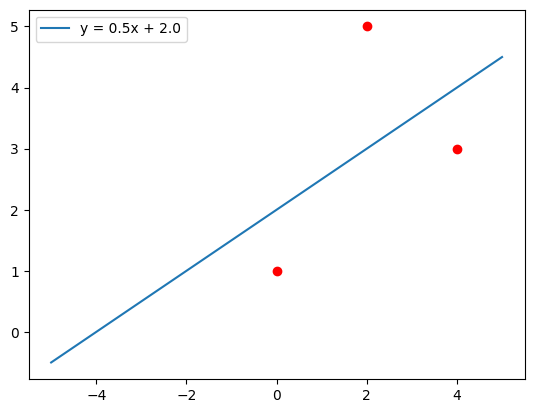

In [15]:
X = np.array([[0], [2], [4]])
y = np.array([1, 5, 3])

model = LinearRegressionPinv()
model.fit(X, y)

x = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(x, model.predict(x), label=f'y = {np.round(model.weights[0], 2)}x + {model.bias}')
plt.legend()
plt.show()

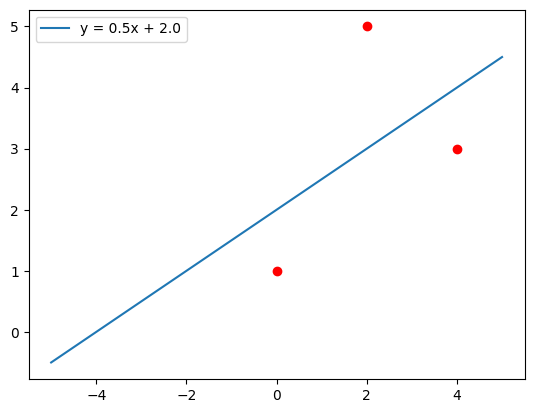

In [16]:
X = np.array([[0], [2], [4]])
y = np.array([1, 5, 3])

model2 = LinearRegressionGrad(lr=1e-2)
model2.fit(X, y)

x = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(x, model2.predict(x), label=f'y = {np.round(model2.weights[0], 2)}x + {np.round(model2.bias, 2)}')
plt.legend()
plt.show()

## Polynomial regression with pseudoinverse implementation

In [43]:
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRegression:

    def __init__(self, degree=2):
        self.poly = PolynomialFeatures(degree)

    def fit(self, X, y):
        # Expand the input variables with bias terms
        self.X = self.poly.fit_transform(X)
        self.y = y
        
        self.weights = np.dot(np.linalg.pinv(self.X), self.y)

    def predict(self, X):
        return np.dot(self.poly.transform(X), self.weights)

## Fitting data to a polynomial regression model

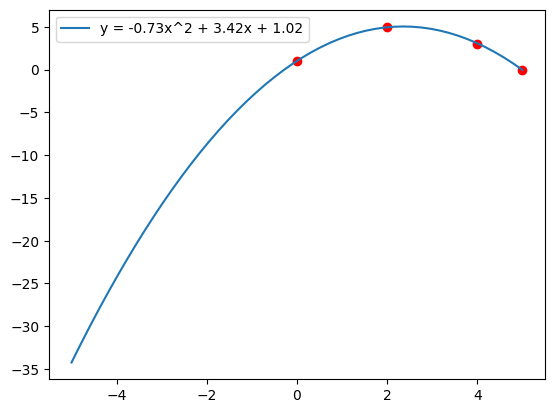

In [44]:
X = np.array([[0], [2], [4], [5]])
y = np.array([1, 5, 3, 0])

model = PolynomialRegression(2)
model.fit(X, y)

x = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(x, model.predict(x), label=f'y = {np.round(model.weights[2], 2)}x^2 + {np.round(model.weights[1], 2)}x + {np.round(model.weights[0], 2)}')
plt.legend()
plt.show()

## Fitting data to a multiple linear regression model

In [45]:
X = np.array([[0, 1],
              [2, 5],
              [4, 3],
              [5, 0]])
y = np.array([50, 30, 20, 10])

model = LinearRegressionPinv()
model.fit(X, y)

print(f'z = {np.round(model.weights[1], 2)}x + {np.round(model.weights[2], 2)}y + {np.round(model.weights[0], 2)}')

z = -7.74x + -0.6y + 50.12


In [52]:
model2 = LinearRegressionGrad(n_iter=2000, lr=1e-2)
model2.fit(X, y)

print(f'z = {np.round(model2.weights[0], 2)}x + {np.round(model2.weights[1], 2)}y + {np.round(model2.bias, 2)}')

z = -7.74x + -0.6y + 50.12
